# Twitter Sentiment Analysis
It is the process of using natural language processing (NLP), machine learning, and statistical techniques to analyze the emotions, opinions, and attitudes expressed in tweets. The goal is to determine whether a tweet conveys a positive, negative, or neutral sentiment.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
# !pip install spacy==3.7.6
# !python -m spacy download en_core_web_sm==3.7.1
# !python -m spacy download en_core_web_sm

# !pip install nltk==3.9.1
# !pip install beautifulsoup4==3.2.2
# !pip install textblob==0.18.0.post0
# !pip install preprocess_kgptalkie
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


#### Load the Dataset

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
path = r'C:\Users\LENOVO\Desktop\dataset\twitter_sentiments.csv'

In [4]:
df = pd.read_csv(path, header = None, index_col = 0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.shape

(74682, 3)

In [6]:
# df.to_csv(r'C:\Users\LENOVO\Desktop\dataset\twitter_reviews.csv', index=True)

In [7]:
df = df[[2,3]].reset_index(drop = True)

In [8]:
df.columns = ['Sentiment', 'Text']
df

,Sentiment,Text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [9]:
df.isnull().sum()

Sentiment      0
Text         686
dtype: int64

In [10]:
df.sample(20)

,Sentiment,Text
12212,Negative,Yo im not gettin no centers on my team wtf wtf...
32637,Neutral,"League, but ranked, and also in the morning. t..."
25038,Positive,Happy to share something that works for me to ...
31897,Neutral,"Riot is like, ""Oh good, you lost."" -28 LP"
73486,Positive,For @MsVixen nVidia RTX a voice has an amazing...
56933,Positive,Welcome back this amazing community..
22439,Neutral,@WilliamGerber1 @ChadSteiner42 if i win i woul...
60016,Irrelevant,Brb crying at the simeon and luke being cute a...
39167,Positive,us
10836,Positive,xbox’s controller looks way much better but I’...


In [11]:
### removing the null values
df.dropna(inplace = True)

## filtering the data 

# sum(df['Text'].apply(len)>5), sum(df['Text'].apply(len)<=5)
print(df.shape)
df = df[df['Text'].apply(len)>5]
print(df.shape)

(73996, 2)
(71890, 2)


In [12]:
df.sample(10)

,Sentiment,Text
20396,Positive,A nice amount of Echo Nylon to have after buyi...
42559,Positive,"Had a pretty amazing streaming time tonight, P..."
73014,Negative,@nvidia @NVIDIAGeForce
68619,Neutral,Cyberpunk Online won’t support VR since “it’s ...
25066,Negative,3 This is a massive mistake.. Chen didn't part...
51188,Negative,From the Fifa 15 soundtrack to Jay 1 in Fifa 2...
59728,Neutral,Too far connected : FTC eyes Facebook antitrus...
23302,Irrelevant,26 percent average concurrent viewers on our f...
1128,Irrelevant,Now that I have a PC and waiting for new games...
11782,Irrelevant,See Smh at NFL2K > > > > > >


In [13]:
df['Sentiment'].value_counts()

Negative      21758
Positive      19912
Neutral       17614
Irrelevant    12606
Name: Sentiment, dtype: int64

#### Preprocessing

In [14]:
# import preprocess_kgptalkie
# import preprocess_kgptalkie as ps


In [15]:
#!pip install googletrans==4.0.0-rc1
# !pip install --upgrade preprocess_kgptalkie


In [16]:
# df.columns
# print(dir(ps))

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [18]:
def extract_features(df, text_column='Text'):
    # Create new columns with text-based features
    df['char_counts'] = df[text_column].apply(len)  # Count total characters
    df['word_counts'] = df[text_column].apply(lambda x: len(x.split()))  # Count words
    df['avg_wordlength'] = df['char_counts'] / (df['word_counts'] + 1)  # Average word length
    df['stopwords_counts'] = df[text_column].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))  # Count stopwords
    df['hashtag_counts'] = df[text_column].apply(lambda x: len(re.findall(r'#\w+', x)))  # Count hashtags
    df['mentions_counts'] = df[text_column].apply(lambda x: len(re.findall(r'@\w+', x)))  # Count mentions (@user)
    df['digits_counts'] = df[text_column].apply(lambda x: len(re.findall(r'\d', x)))  # Count digits
    df['uppercase_counts'] = df[text_column].apply(lambda x: len([char for char in x if char.isupper()]))  # Count uppercase letters
    
    return df

In [19]:
df = extract_features(df, text_column='Text')
df.tail(50)


,Sentiment,Text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
74632,Neutral,Save $ 500 on the AERO 15 OLED - Edge Award 20...,281,54,5.109091,12,0,0,16,27
74633,Neutral,than $500 on the AERO VA OLED - Award winning ...,215,40,5.243902,12,0,0,8,21
74634,Positive,Love EVERYTHING about it .,27,5,4.500000,2,0,0,0,11
74635,Positive,Love EVERYTHING about it.,25,4,5.000000,1,0,0,0,11
74636,Positive,Love EVERYTHING about it.,25,4,5.000000,1,0,0,0,11
74637,Positive,Love EVERYTHING about it �,26,5,4.333333,2,0,0,0,11
74638,Positive,22 Love EVERYTHING All about it.,32,6,4.571429,2,0,0,2,12
74639,Positive,Love EVERYTHING about anything.,31,4,6.200000,1,0,0,0,11
74640,Positive,"Checked for new GPU drivers today, went to the...",208,37,5.473684,12,0,0,3,13
74641,Positive,"Today I searched for new GPU drivers, went to ...",217,39,5.425000,15,0,0,3,13


In [20]:
df.head()

,Sentiment,Text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,53,11,4.416667,6,0,0,0,0
1,Positive,I am coming to the borders and I will kill you...,51,12,3.923077,8,0,0,0,2
2,Positive,im getting on borderlands and i will kill you ...,50,10,4.545455,5,0,0,0,0
3,Positive,im coming on borderlands and i will murder you...,51,10,4.636364,5,0,0,0,0
4,Positive,im getting on borderlands 2 and i will murder ...,57,12,4.384615,6,0,0,1,0


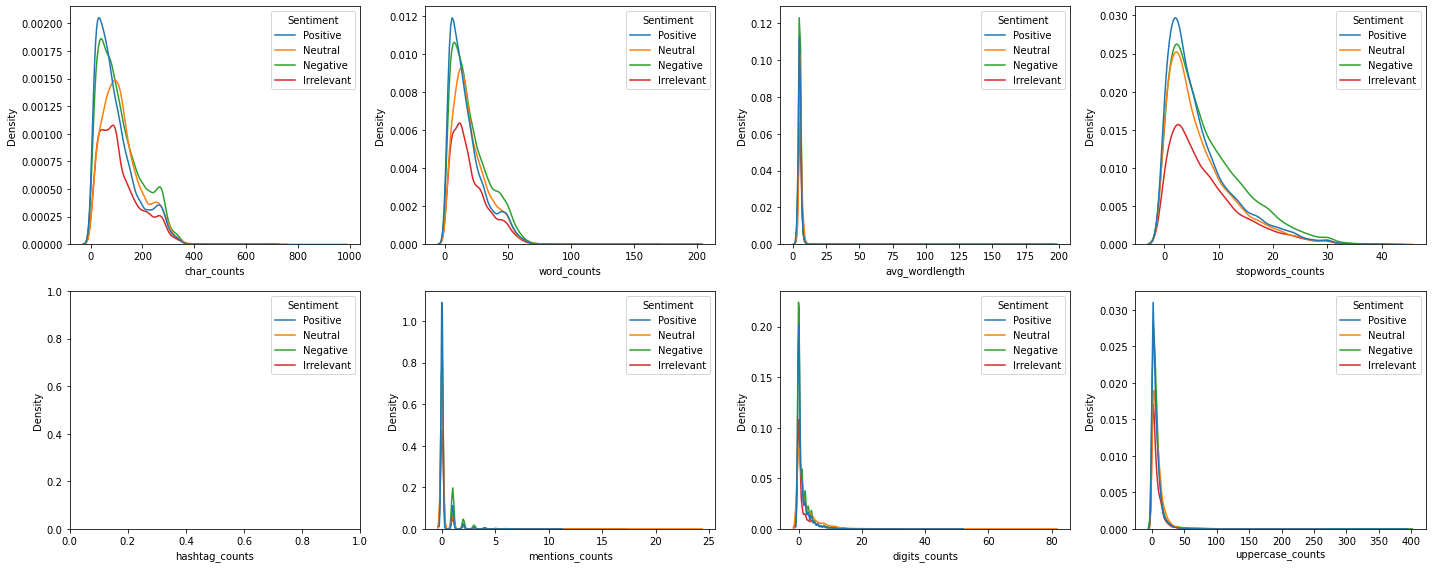

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
columns = df.select_dtypes(include ='number').columns  ## only to select the numericals columns 

for i, col in enumerate(columns, 1):  # Start index from 1
    plt.subplot(2, 4, i) 
    sns.kdeplot(data = df,x=col, hue='Sentiment')
    
plt.tight_layout()
plt.show()


<AxesSubplot:ylabel='Sentiment'>

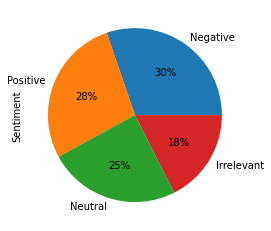

In [22]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [23]:
## word cloud visualizations
from wordcloud import WordCloud, STOPWORDS
# stopwords = set(STOPWORDS)

# wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords = stopwords).generate(str(df['Text']))
# plt.imshow(wordcloud)



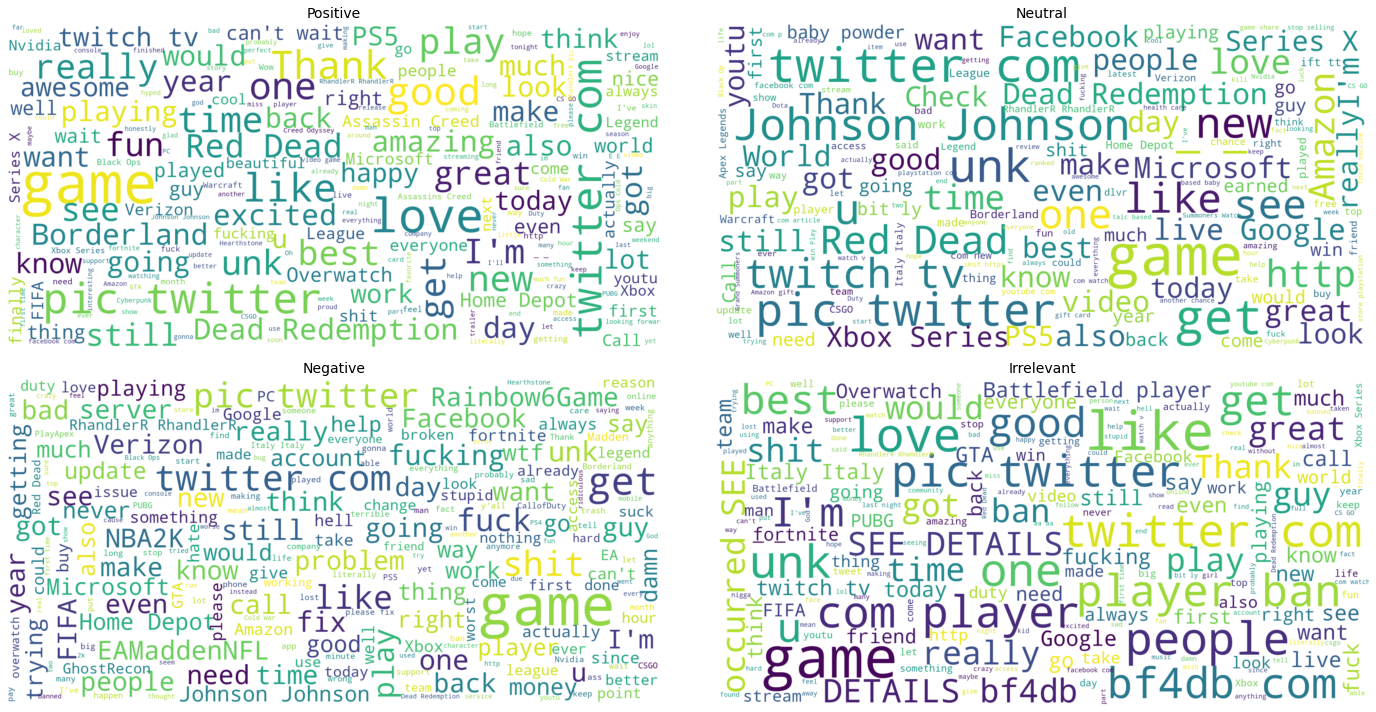

In [24]:
plt.figure(figsize=(20, 10))  # Adjust figure size

# Generate Word Clouds for Each Unique Sentiment
for index, sentiment in enumerate(df['Sentiment'].unique()):
    plt.subplot(2, 2, index + 1)  # Create subplot grid (2 rows, 2 columns)
    
    # Filter text by sentiment
    text_data = ' '.join(df[df['Sentiment'] == sentiment]['Text'].astype(str))  
    
    # Generate word cloud
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=300,
        max_font_size=35,
        scale=5
    ).generate(text_data)
    
    # Plot the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(sentiment, fontsize=14)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [25]:
df['Text']=df['Text'].apply(lambda text:text.lower().strip()) # remove the upper case and extra space
df['Text']=df['Text'].apply(lambda text: re.sub(r'http\S+|www\S+', '', text)) ## removing the urls
df['Text']=df['Text'].apply(lambda text: re.sub(r'<.*?>', '', text)) ## remove html tags
df['Text']=df['Text'].apply(lambda text: re.sub(r'\bRT\b', '', text))## remove the retweets
df['Text'] = df['Text'].apply(lambda text: re.sub(r'[^a-zA-Z0-9\s]', '', text)) ## remove the specials characters
                                                                        

In [26]:
print(df['Text'].head(50))

0     im getting on borderlands and i will murder yo...
1     i am coming to the borders and i will kill you...
2     im getting on borderlands and i will kill you all
3     im coming on borderlands and i will murder you...
4     im getting on borderlands 2 and i will murder ...
5     im getting into borderlands and i can murder y...
6     so i spent a few hours making something for fu...
7     so i spent a couple of hours doing something f...
8     so i spent a few hours doing something for fun...
9     so i spent a few hours making something for fu...
10    2010 so i spent a few hours making something f...
12    rockhard la varlope rare  powerful handsome ja...
13    rockhard la varlope rare  powerful handsome ja...
14    rockhard la varlope rare  powerful handsome ja...
15    rockhard la vita rare but powerful handsome ja...
16    live rock  hard music la la varlope rare  the ...
17    ihard like me rare london de handsome 2011 bor...
18    that was the first borderlands session in 

In [27]:
## Spliting train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Text'],df['Sentiment'],test_size=0.2,random_state=0)

In [28]:
X_train.shape, X_test.shape

((57512,), (14378,))

#### Model Building and Testing

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfid',TfidfVectorizer()),
                ('rfc',RandomForestClassifier(n_jobs=1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=1))])

In [30]:
from sklearn.metrics import classification_report


In [31]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.85      0.91      2483
    Negative       0.92      0.96      0.94      4439
     Neutral       0.92      0.92      0.92      3510
    Positive       0.91      0.94      0.92      3946

    accuracy                           0.92     14378
   macro avg       0.93      0.92      0.92     14378
weighted avg       0.93      0.92      0.92     14378



In [34]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl",'wb'))

In [33]:
clf.predict(["I am glad to find this"])

array(['Positive'], dtype=object)